In [4]:
import gymnasium as gym
from agent import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [3]:
env = gym.make("CartPole-v1", render_mode='human')
agent = Agent(alpha=0.0005, gamma=0.99, n_actions=env.action_space.n, n_obs=env.observation_space.shape[0])
episodes = 200

In [5]:
# # If you want to see trained model:
# path = os.path.join("Saved Models", "My_trained_Models")
# agent.load_model(path)

# # If you want to save your custom model:
# path = os.path.join("Saved Models", "My_trained_Models")
# agent.save(path)

# # Testing with trained model:
# score_history = []
# avg_history = []
# for i in range(episodes):
#     done = False
#     score = 0
#     observation = env.reset()[0]
#     while not done:
#         action = agent.choose_action(observation)
#         observation_, rew, done, _, _ = env.step(action)
#         agent.store_transition(observation, action, rew)
#         observation = observation_
#         score += rew
#     score_history.append(score)
#     avg_history.append(np.mean(score_history[-20:]))
#     print(f'Episode: {i} // Score: {avg_history[-1]}')

In [4]:
score_history = []
avg_history = []
for i in range(episodes):
    done = False
    score = 0
    observation = env.reset()[0]
    while not done:
        action = agent.choose_action(observation)
        observation_, rew, done, _, _ = env.step(action)
        agent.store_transition(observation, action, rew)
        observation = observation_
        score += rew
    score_history.append(score)
    agent.learn()
    avg_history.append(np.mean(score_history[-20:]))
    print(f'Episode: {i} // Score: {avg_history[-1]}')

Episode: 0 // Score: 23.0
Episode: 1 // Score: 26.0
Episode: 2 // Score: 24.0
Episode: 3 // Score: 27.25
Episode: 4 // Score: 25.8
Episode: 5 // Score: 23.5
Episode: 6 // Score: 23.285714285714285
Episode: 7 // Score: 22.5
Episode: 8 // Score: 22.11111111111111
Episode: 9 // Score: 21.0
Episode: 10 // Score: 21.636363636363637
Episode: 11 // Score: 21.833333333333332
Episode: 12 // Score: 21.76923076923077
Episode: 13 // Score: 24.785714285714285
Episode: 14 // Score: 25.2
Episode: 15 // Score: 24.5
Episode: 16 // Score: 24.176470588235293
Episode: 17 // Score: 24.666666666666668
Episode: 18 // Score: 27.105263157894736
Episode: 19 // Score: 28.85
Episode: 20 // Score: 28.4
Episode: 21 // Score: 30.75
Episode: 22 // Score: 31.4
Episode: 23 // Score: 30.15
Episode: 24 // Score: 29.8
Episode: 25 // Score: 30.25
Episode: 26 // Score: 31.4
Episode: 27 // Score: 31.6
Episode: 28 // Score: 31.9
Episode: 29 // Score: 33.2
Episode: 30 // Score: 32.85
Episode: 31 // Score: 34.35
Episode: 32 // 

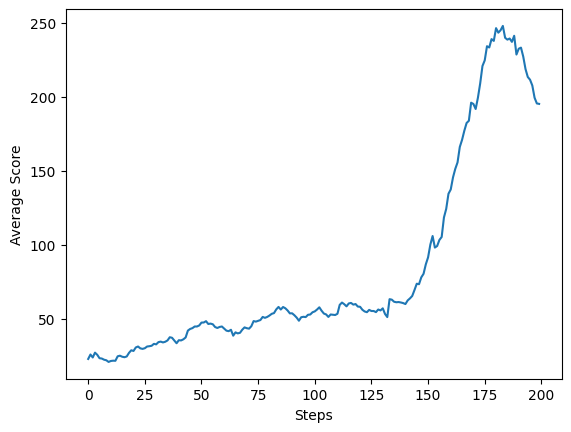

In [6]:
plt.plot(list(range(len(avg_history))), avg_history)
plt.xlabel('Steps')
plt.ylabel('Average Score')
plt.show()